## <Center> K-Means Clustering
    
<Center><author> Zander Bonnet
    
<center><Date> September 4, 2024

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as sty
sty.use('default')
import seaborn as sns
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer
from sklearn.cluster import KMeans

In the k-means process, we select k-random points to make the center of our clusters and then assign all surrounding points to the closest ‘centroid’. After doing this we take the clusters of points and find the average of them. This average becomes the centroid, and the process repeats until the model converges. This means that there are no, or very little, data points that jump between clusters in between runs.

The major questions that we hope to awnser when using kmeans clustering are:
1. Can we detect any patterns within the data?
2. If we do detect patterns what insite can we gain from it?

In [2]:
#Creates a Kmeans method
from sklearn.metrics.pairwise import pairwise_distances
class MyKMeans:
    def __init__(self, n_clusters, max_iters=100, seed = None):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        if seed != None:
            np.random.seed(seed)

    def fit(self, X):
        # Pick random centroids
        self.centroids = X.iloc[np.random.choice(X.shape[0], self.n_clusters, replace=False)]
        
        for i in range(self.max_iters):
            # Assign each data point to the nearest centroid
            labels = self.make_labels(X)
            
            # Update centroids
            new_centroids = self.better_centroids(X, labels)
            
            # Check for convergence
            if np.all(self.centroids == new_centroids):
                break
                
            self.centroids = new_centroids

    def make_labels(self, X):
        # Compute distances from each data point to centroids        
        distances = pairwise_distances(X,self.centroids)
        
        # Assign labels based on the nearest centroid
        return np.argmin(distances, axis=1)
    
    def better_centroids(self, X, labels):
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(self.n_clusters)])
        return new_centroids

The dataset is explained below. Using clustering we hope to uncover trends within the data that are not easily seen at first glance of the data.

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
online_shoppers_purchasing_intention_dataset = fetch_ucirepo(id=468) 
  
# data (as pandas dataframes) 
X = online_shoppers_purchasing_intention_dataset.data.features 
y = online_shoppers_purchasing_intention_dataset.data.targets 
  
# metadata 
print(online_shoppers_purchasing_intention_dataset.metadata) 
  
# variable information 
print(online_shoppers_purchasing_intention_dataset.variables) 

{'uci_id': 468, 'name': 'Online Shoppers Purchasing Intention Dataset', 'repository_url': 'https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/468/data.csv', 'abstract': 'Of the 12,330 sessions in the dataset,\n84.5% (10,422) were negative class samples that did not\nend with shopping, and the rest (1908) were positive class\nsamples ending with shopping.', 'area': 'Business', 'tasks': ['Classification', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 12330, 'num_features': 17, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Revenue'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2018, 'last_updated': 'Thu Jan 11 2024', 'dataset_doi': '10.24432/C5F88Q', 'creators': ['C. Sakar', 'Yomi Kastro'], 'intro_paper': {'title': 'Real-time prediction of online shoppers’ purchasing intention using multi

In [4]:
X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True


In [5]:
#Get dummy vars and standardize the data
dum1 = pd.get_dummies(X)
scaler = StandardScaler()
dum1 = pd.DataFrame(scaler.fit_transform(dum1))
dum1

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,-0.190548,-0.154649,-0.427739,-0.612532,-0.566798,-0.215871,-0.194175,-0.399087,-0.083316,0.410621
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,...,-0.190548,-0.154649,-0.427739,-0.612532,-0.566798,-0.215871,-0.194175,-0.399087,-0.083316,0.410621
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,...,-0.190548,-0.154649,-0.427739,-0.612532,-0.566798,-0.215871,-0.194175,-0.399087,-0.083316,0.410621
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,...,-0.190548,-0.154649,-0.427739,-0.612532,-0.566798,-0.215871,-0.194175,-0.399087,-0.083316,0.410621
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,...,-0.190548,-0.154649,-0.427739,-0.612532,-0.566798,-0.215871,-0.194175,-0.399087,-0.083316,0.410621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.206173,0.363075,-0.396478,-0.244931,0.478227,0.307822,-0.310366,-0.288966,0.342125,-0.308821,...,-0.190548,-0.154649,-0.427739,-0.612532,-0.566798,-0.215871,-0.194175,-0.399087,-0.083316,0.410621
12326,-0.696993,-0.457191,-0.396478,-0.244931,-0.601062,-0.380957,-0.457683,-0.447364,-0.317178,-0.308821,...,-0.190548,-0.154649,-0.427739,-0.612532,1.764296,-0.215871,-0.194175,-0.399087,-0.083316,0.410621
12327,-0.696993,-0.457191,-0.396478,-0.244931,-0.578577,-0.528063,1.261014,0.897093,-0.317178,-0.308821,...,-0.190548,-0.154649,-0.427739,-0.612532,1.764296,-0.215871,-0.194175,-0.399087,-0.083316,0.410621
12328,0.507228,-0.032916,-0.396478,-0.244931,-0.376210,-0.443536,-0.457683,-0.453140,-0.317178,-0.308821,...,-0.190548,-0.154649,-0.427739,-0.612532,1.764296,-0.215871,-0.194175,-0.399087,-0.083316,0.410621


In [6]:
#do a mock Kmeans using my method
km = MyKMeans(n_clusters = 2, seed =300)
km.fit(dum1)
pred1 = km.make_labels(dum1)

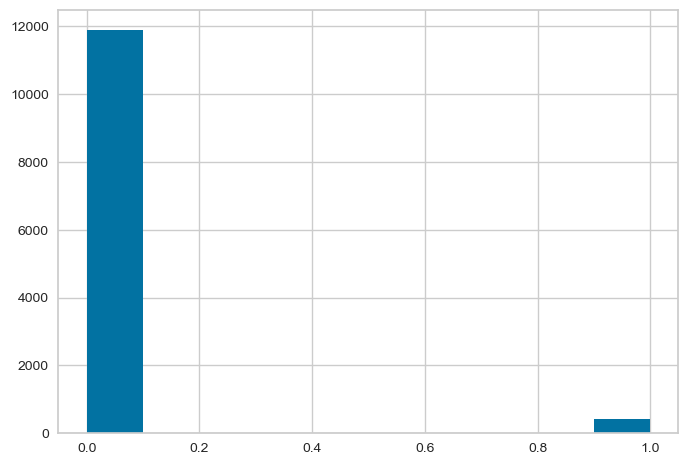

In [7]:
plt.hist(pred1)
plt.show()

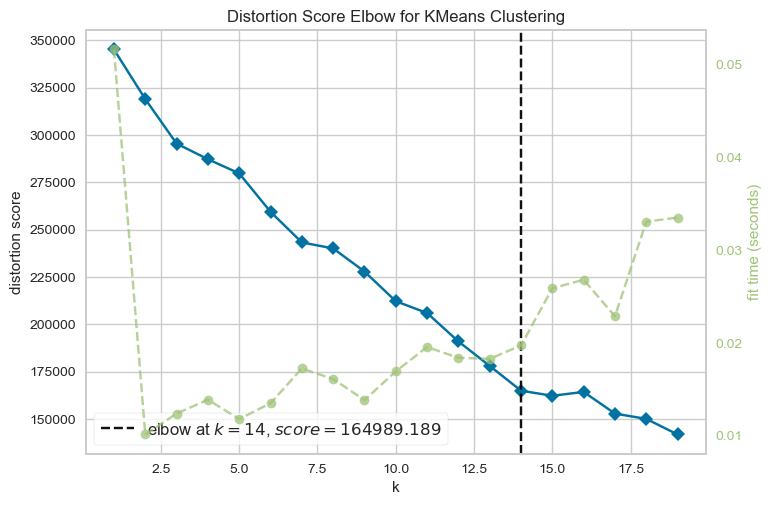

In [8]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20))

visualizer.fit(dum1)   
visualizer.show()
plt.show()

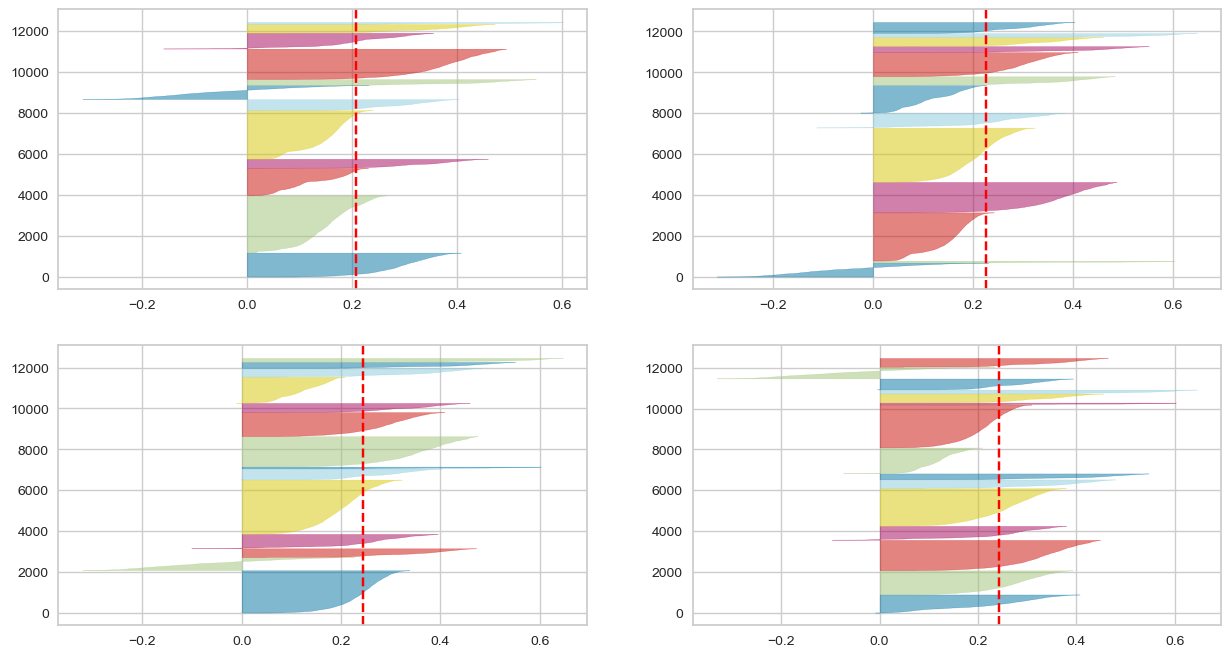

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [12, 13, 14, 15]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-6][mod])
    visualizer.fit(dum1)

Using the elbow plot and the silhouette plot we can see that 14 clusters is most likely the most optimal number of clusters. These plots do also show that there are very large scores associated with them. This could show that the clusters are not very unique, and the model is struggling to find real distinction between the clusters.

In [10]:
#fit the model
kmeans = KMeans(n_clusters=14)
pred1 = kmeans.fit(dum1)

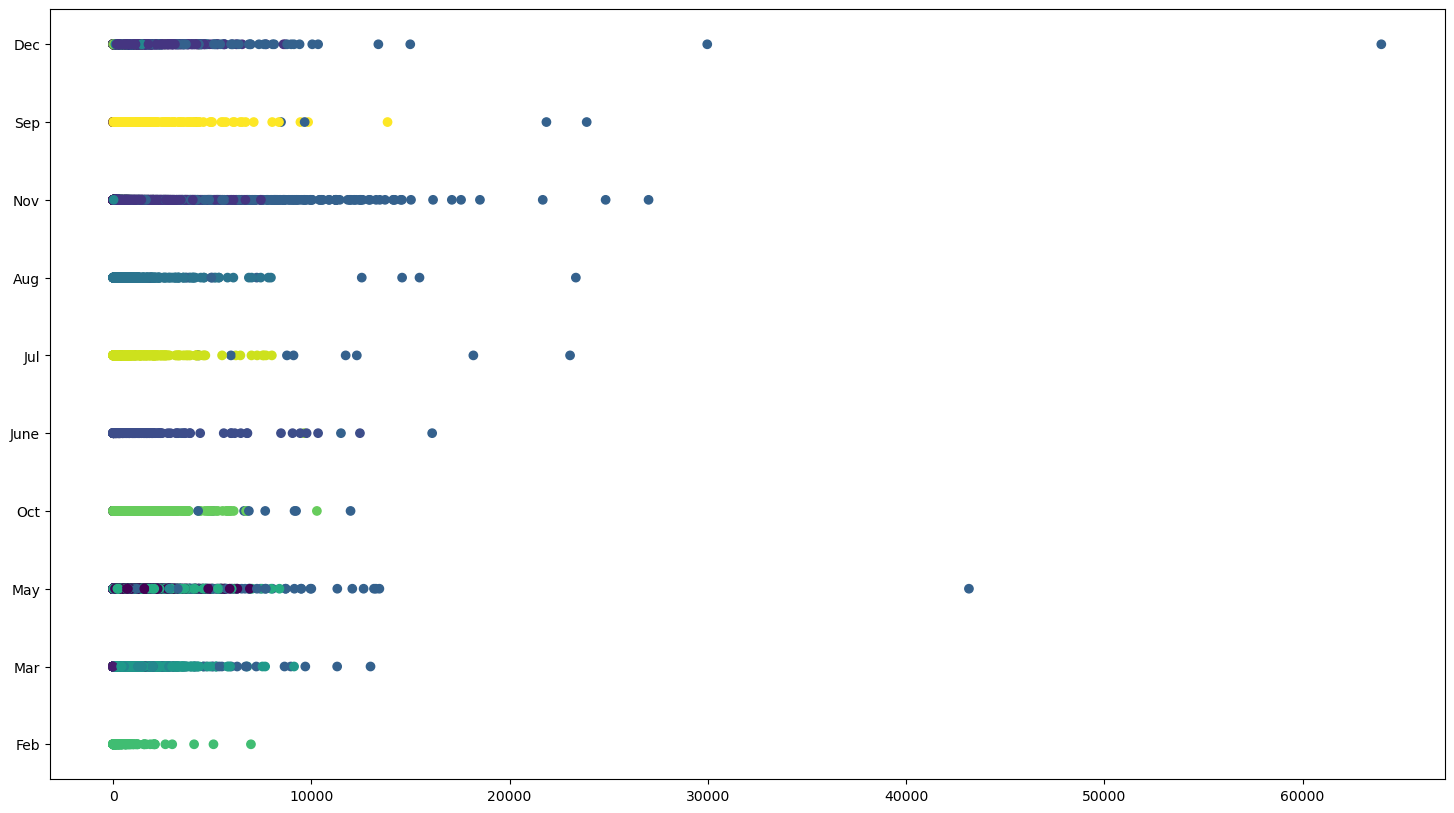

In [11]:
plt.figure(figsize = (18,10))
sty.use('default')
plt.scatter(X['ProductRelated_Duration'], X['Month'], c = pred1.labels_)
plt.show()

When looking at the product-related duration vs the month we can see that there is some separation between the clusters. We can see that September seems to be its own cluster, and February seems to also be isolated. This could lead us to see that our data is potentially seasonal. With this model we were able to see that the data might have a seasonal pattern, as it appears that the clusters are formed around the months of the year. So we were able to answer both of our questions with this analysis.




The next dataset is described below.

In [12]:
# fetch dataset 
apartment_for_rent_classified = fetch_ucirepo(id=555) 
  
# data (as pandas dataframes) 
X = apartment_for_rent_classified.data.features 
y = apartment_for_rent_classified.data.targets 
  
# metadata 
print(apartment_for_rent_classified.metadata) 
  
# variable information 
print(apartment_for_rent_classified.variables) 


{'uci_id': 555, 'name': 'Apartment for Rent Classified', 'repository_url': 'https://archive.ics.uci.edu/dataset/555/apartment+for+rent+classified', 'data_url': 'https://archive.ics.uci.edu/static/public/555/data.csv', 'abstract': 'This is a dataset of classified for apartments for rent in USA.\n', 'area': 'Business', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 10000, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': None, 'index_col': ['id'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C5X623', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': "The dataset contains of 10'000 or 100'000 rows and of 22 columns The data has been cleaned in the way that \r\ncolumn price and square_feet never is empty but the dataset is saved as it was created.\r\n\r\n

/var/folders/fc/97_w0wn53dd0skbf332p6dd00000gn/T/ipykernel_39279/2935559136.py:2: DtypeWarning: Columns (0,5,6,12,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  apartment_for_rent_classified = fetch_ucirepo(id=555)


In [13]:
#pick the most important variables  and elminate redundent varaibles
keep = ['amenities', 'bathrooms', 'bedrooms', 'currency', 'fee', 'has_photo', 'pets_allowed', 
        'price', 'price_type', 'square_feet', 'latitude', 'longitude']
clean = X[keep]
#Take a sample of the whole dataset to reduce the computational power required
clean = clean.sample(round(clean.shape[0]*.15), replace = False)
clean = clean.reset_index(drop = True)
print(clean.shape)
clean.head()

(14974, 12)


,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_type,square_feet,latitude,longitude
0,Parking,2,2,USD,No,Yes,NaN,1468.0,Monthly,1100,27.3216,-82.4763
1,"Gym,Internet Access,Parking,Pool",1,1,USD,No,Yes,NaN,1456.0,Monthly,815.0,41.8377,-88.1297
2,"Gym,Pool",1.5,1,USD,No,Yes,NaN,4050.0,Monthly,1053.0,33.9452,-118.3832
3,NaN,1,1,USD,No,No,Cats,1715.0,Monthly,913,40.8550,-74.2778
4,"AC,Cable or Satellite,Clubhouse,Dishwasher,Fir...",1,1,USD,No,Yes,"Cats,Dogs",810.0,Monthly,635.0,35.2203,-80.7878


In [14]:
clean.dtypes

amenities        object
bathrooms        object
bedrooms         object
currency         object
fee              object
has_photo        object
pets_allowed     object
price           float64
price_type       object
square_feet      object
latitude        float64
longitude       float64
dtype: object

In [15]:
#find the nonfloats in the categories that are expected to be numerical
check = ['bathrooms', 'bedrooms', 'square_feet']
bad = []
index = 0
for i in range(clean[check].shape[0]):
    for c in range(clean[check].shape[1]):
        try:
            float(clean[check].iloc[i,c])
        except:
            bad.append(index)
    index = index + 1
bad

[12860, 12860]

In [16]:
clean = clean.drop(bad)
clean = clean.reset_index(drop = True)

In [17]:
clean.head()

,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_type,square_feet,latitude,longitude
0,Parking,2,2,USD,No,Yes,NaN,1468.0,Monthly,1100,27.3216,-82.4763
1,"Gym,Internet Access,Parking,Pool",1,1,USD,No,Yes,NaN,1456.0,Monthly,815.0,41.8377,-88.1297
2,"Gym,Pool",1.5,1,USD,No,Yes,NaN,4050.0,Monthly,1053.0,33.9452,-118.3832
3,NaN,1,1,USD,No,No,Cats,1715.0,Monthly,913,40.8550,-74.2778
4,"AC,Cable or Satellite,Clubhouse,Dishwasher,Fir...",1,1,USD,No,Yes,"Cats,Dogs",810.0,Monthly,635.0,35.2203,-80.7878


In [18]:
#fix the data types
clean['square_feet'] = clean['square_feet'].astype(float)
clean['bedrooms'] = clean['bedrooms'].astype(float)
clean['bathrooms'] = clean['bathrooms'].astype(float)

In [19]:
#Fix the nan values in the categorical varaibles
clean.loc[:,'amenities'] = clean.loc[:,'amenities'].replace(np.nan, 'No Amenities')
clean.loc[:,'pets_allowed'] = clean.loc[:,'pets_allowed'].replace(np.nan, 'No Pets')

In [20]:
clean.isna().apply(lambda x: sum(x))

amenities        0
bathrooms        7
bedrooms        17
currency         0
fee              0
has_photo        0
pets_allowed     0
price            0
price_type       0
square_feet      0
latitude         4
longitude        4
dtype: int64

In [21]:
#make the lists true python lists
clean.loc[:,'amenities'] = clean.loc[:,'amenities'].apply(lambda x: x.split(','))
clean.loc[:,'pets_allowed'] = clean.loc[:,'pets_allowed'].apply(lambda x: x.split(','))

In [22]:
clean = clean.dropna()
clean = clean.reset_index(drop = True)

In [23]:
clean.head()

,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_type,square_feet,latitude,longitude
0,[Parking],2.0,2.0,USD,No,Yes,[No Pets],1468.0,Monthly,1100.0,27.3216,-82.4763
1,"[Gym, Internet Access, Parking, Pool]",1.0,1.0,USD,No,Yes,[No Pets],1456.0,Monthly,815.0,41.8377,-88.1297
2,"[Gym, Pool]",1.5,1.0,USD,No,Yes,[No Pets],4050.0,Monthly,1053.0,33.9452,-118.3832
3,[No Amenities],1.0,1.0,USD,No,No,[Cats],1715.0,Monthly,913.0,40.8550,-74.2778
4,"[AC, Cable or Satellite, Clubhouse, Dishwasher...",1.0,1.0,USD,No,Yes,"[Cats, Dogs]",810.0,Monthly,635.0,35.2203,-80.7878


In [24]:
#preprocess to make dummy variables for amenities and animals
mlb = MultiLabelBinarizer()
amens = pd.DataFrame(mlb.fit_transform(clean['amenities']),columns=mlb.classes_, index=clean.index)
pets = pd.DataFrame(mlb.fit_transform(clean['pets_allowed']),columns=mlb.classes_, index=clean.index)

In [25]:
dum2 = pd.concat([clean,amens,pets],axis = 1)
dum2 = dum2.drop(['amenities', 'pets_allowed'], axis = 1)

In [26]:
#standardize the data after assigning all the dummy variables
dum2 = pd.get_dummies(dum2)
scaler = StandardScaler()
dum2 = pd.DataFrame(scaler.fit_transform(dum2))
dum2.head()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,1.026959,0.358141,-0.073817,0.406299,-2.099860,0.581439,-0.436740,-0.062418,-0.207515,-0.386573,...,-0.771462,0.886550,-0.223662,0.0,0.043325,-0.043325,-0.319719,-0.715249,0.870648,0.0
1,-0.823970,-0.973637,-0.088618,-0.398183,1.063966,0.223069,-0.436740,-0.062418,-0.207515,-0.386573,...,-0.771462,0.886550,-0.223662,0.0,0.043325,-0.043325,-0.319719,-0.715249,0.870648,0.0
2,0.101495,-0.973637,3.110976,0.273630,-0.656227,-1.694704,-0.436740,-0.062418,-0.207515,-0.386573,...,-0.771462,0.886550,-0.223662,0.0,0.043325,-0.043325,-0.319719,-0.715249,0.870648,0.0
3,-0.823970,-0.973637,0.230848,-0.121554,0.849783,1.101143,-0.436740,-0.062418,-0.207515,-0.386573,...,-0.771462,-1.127968,-0.223662,0.0,0.043325,-0.043325,3.127751,-0.715249,-1.148569,0.0
4,-0.823970,-0.973637,-0.885433,-0.906277,-0.378316,0.688473,2.289692,-0.062418,-0.207515,2.586835,...,1.296239,-1.127968,-0.223662,0.0,0.043325,-0.043325,-0.319719,-0.715249,0.870648,0.0


In [27]:
km = MyKMeans(n_clusters = 2, seed =300)
km.fit(dum2)
pred2 = km.make_labels(dum2)

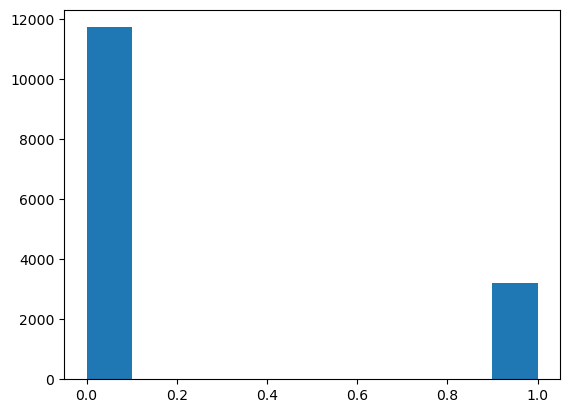

In [28]:
plt.hist(pred2)
plt.show()

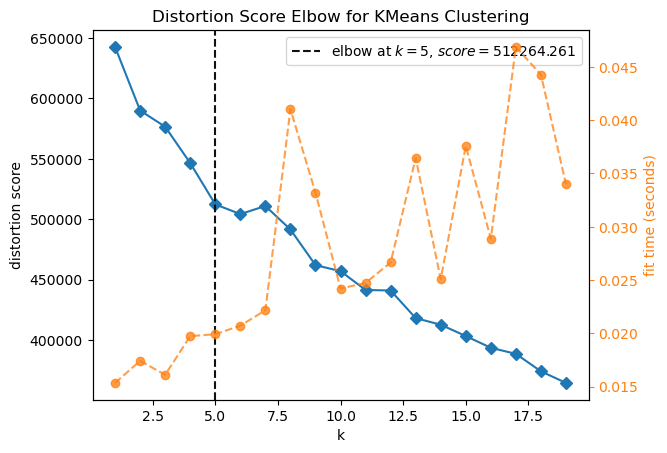

In [29]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20))

visualizer.fit(dum2)   
visualizer.show()
plt.show()

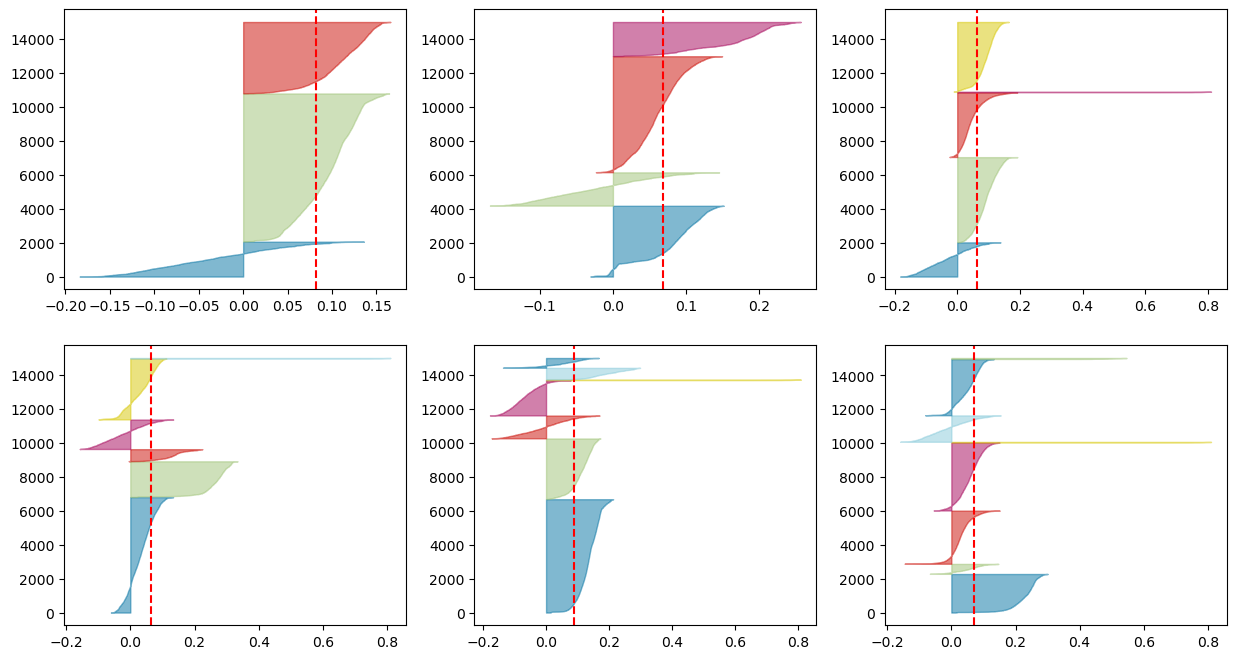

In [30]:
fig, ax = plt.subplots(2, 3, figsize=(15,8))
for i in [3, 4, 5, 6, 7, 8]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 3)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(dum2)

By looking at both the silhouette plot and the elbow plot we can see that the most likely optimal number of clusters is about 5. There is a rough elblow at that point, and the silhouette plot shows almost all 5 clusters are past thje average line, and are all roughly the same size. 

In [31]:
kmeans = KMeans(n_clusters=5)
pred2 = kmeans.fit(dum2)

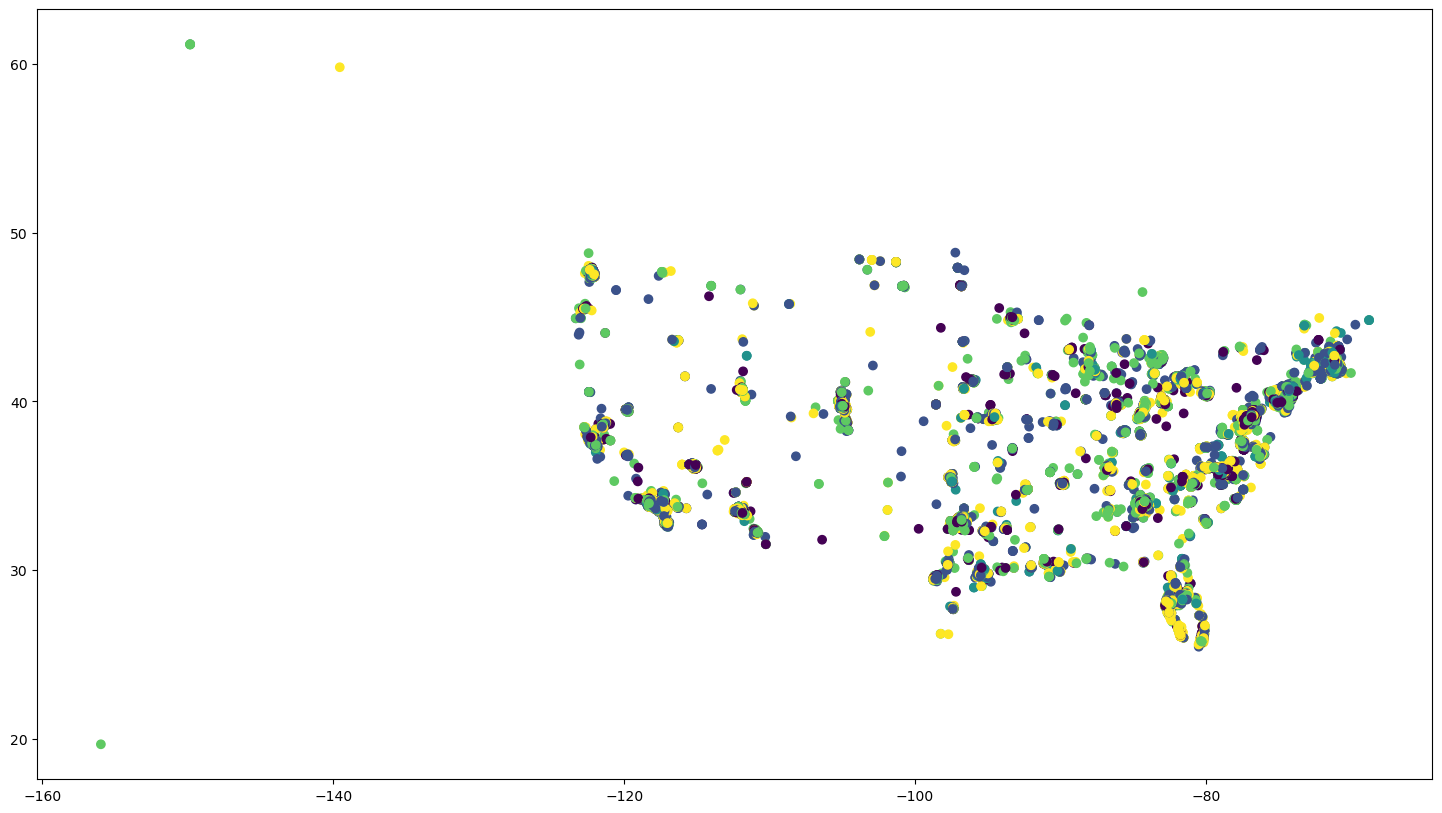

In [32]:
plt.figure(figsize = (18,10))
sty.use('default')
plt.scatter(clean['longitude'], clean['latitude'], c = pred2.labels_)
plt.show()

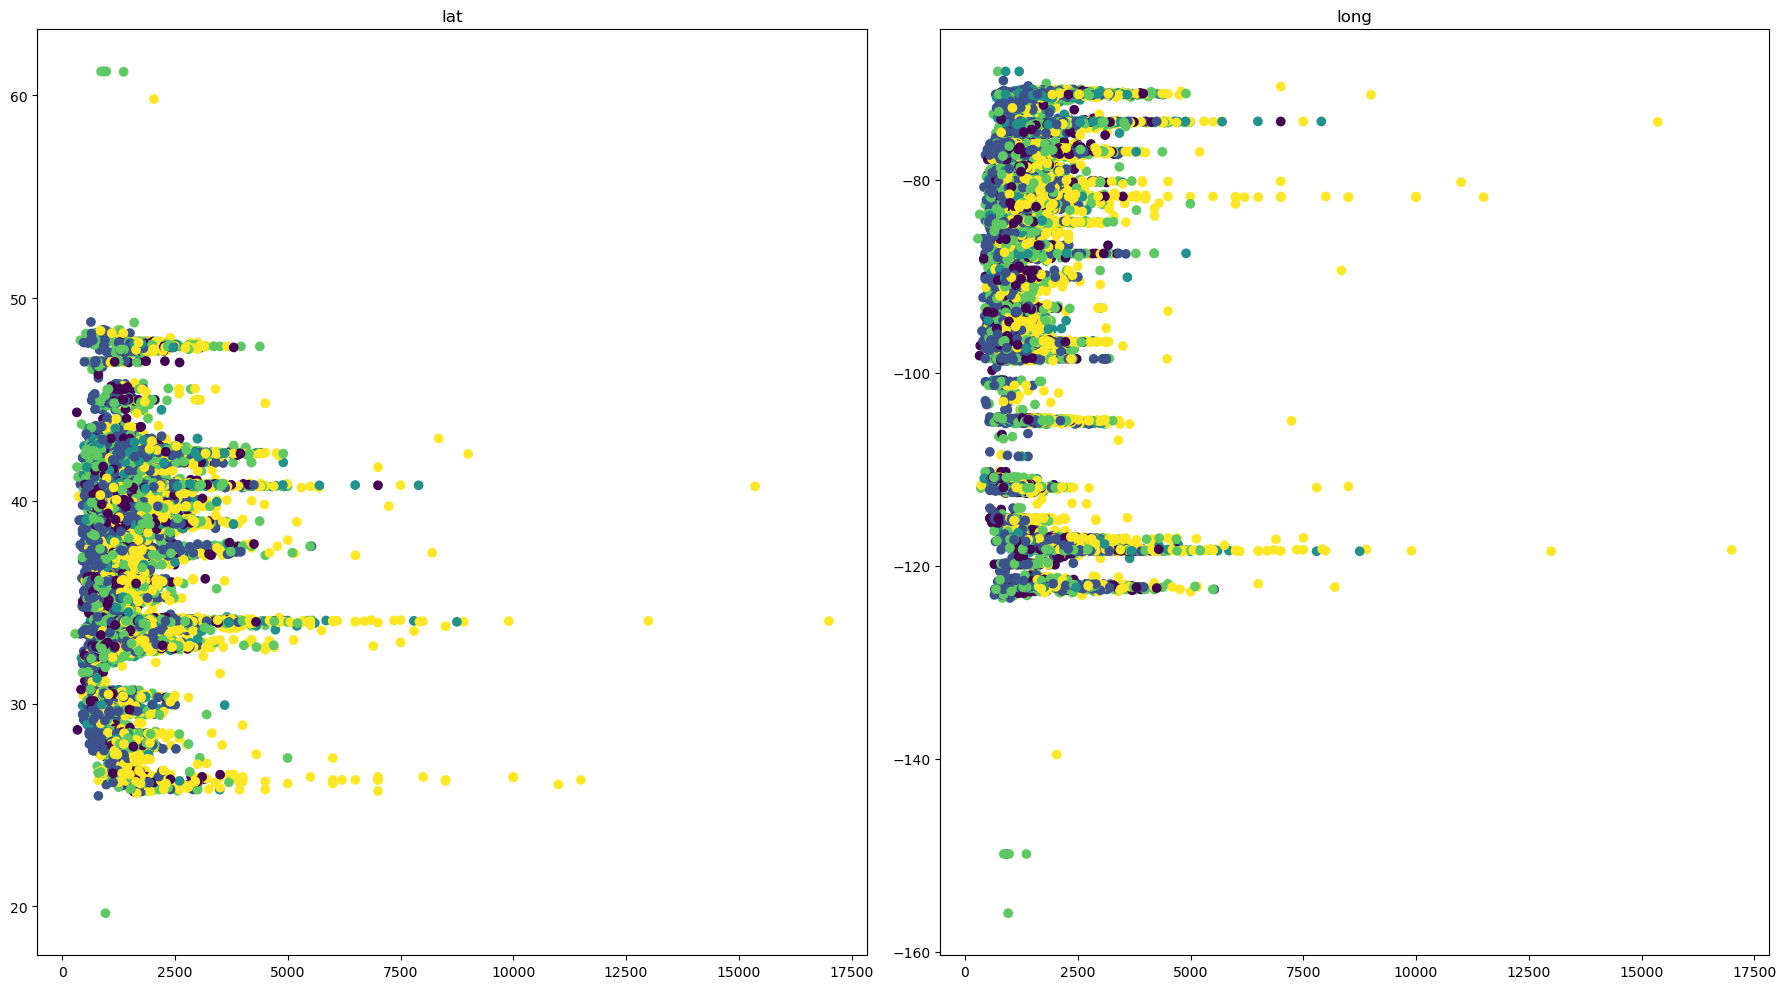

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 10))
axes[0].scatter(clean['price'], clean['latitude'], c = pred2.labels_)
axes[0].set_title('lat')
axes[1].scatter(clean['price'], clean['longitude'], c = pred2.labels_)
axes[1].set_title('long')
fig.tight_layout()
plt.show()

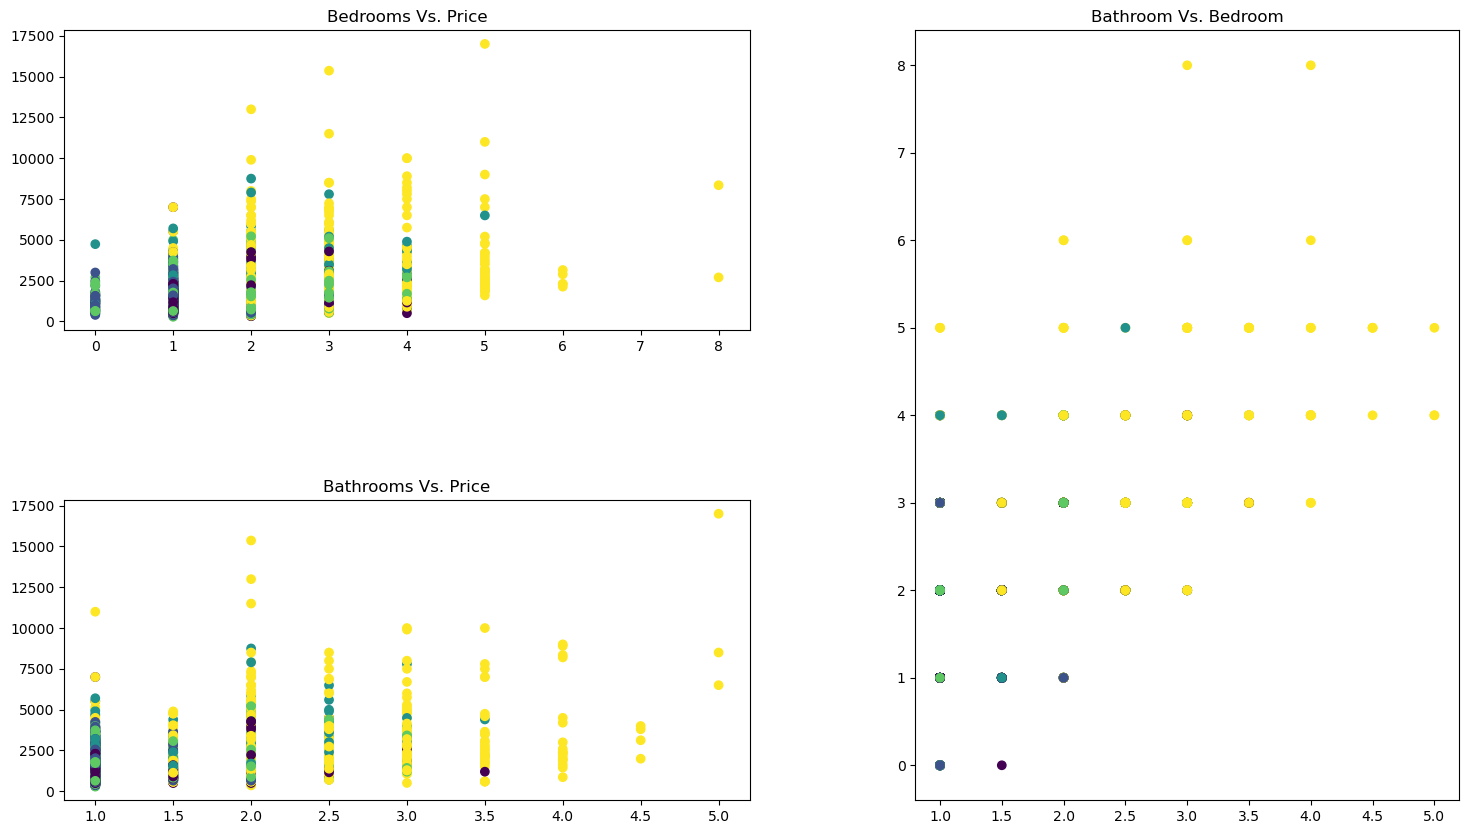

In [34]:
plt.figure(figsize = (18,10))
plot1 = plt.subplot2grid((10, 10), (0,0), rowspan = 4,colspan=5)
plot2 = plt.subplot2grid((10, 10), (0, 6), rowspan=10, colspan=10)
plot3 = plt.subplot2grid((10, 10), (6, 0), rowspan = 5,colspan=5)

plot2.scatter(clean['bathrooms'], clean['bedrooms'], c = pred2.labels_)
plot2.set_title('Bathroom Vs. Bedroom')
plot1.scatter(clean['bedrooms'], clean['price'], c = pred2.labels_)
plot1.set_title('Bedrooms Vs. Price')
plot3.scatter(clean['bathrooms'], clean['price'], c = pred2.labels_)
plot3.set_title('Bathrooms Vs. Price')
fig.tight_layout()
plt.show()

When looking at these results there is not a ton of separation between the groups, but we can see that it does seem to roughly separate the cost. In the bedroom and bathroom plots, we can see the yellow cluster starts to take over as the price increases. We can also see that there is a correlation between price and the number of bedrooms and bathrooms. Then when looking at the geographic data we can see that the prices tend to be higher around the coastal areas. We can see this as there is much more of the yellow is heavily populated areas and coastal areas. This answers both of our research questions. We were able to find a handful of distinct groups, and then find a pattern within the data.

## <center> Reference
    Apartment for Rent Classified. (2019). UCI Machine Learning Repository. 
        https://archive.ics.uci.edu/dataset/555/apartment+for+rent+classified
    
    Online Shoppers Purchasing Intention Dataset. (2018). UCI Machine Learning Repository. 
        https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset
  
